In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\Acer\Downloads\Dac_Dataset.csv")

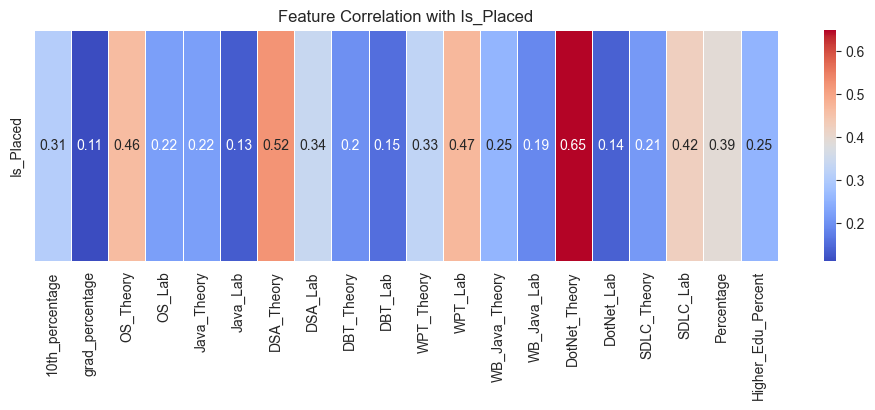

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix and extract only 'Is_Placed' correlations
correlation_with_target = df[numerical_cols].corr()["Is_Placed"].drop("Is_Placed")

# Plot correlation as a heatmap for 'Is_Placed' only
plt.figure(figsize=(12, 3))
sns.heatmap(correlation_with_target.to_frame().T, annot=True, cmap="coolwarm", linewidths=0.5)

# Set title
plt.title("Feature Correlation with Is_Placed")

# Show plot
plt.show()


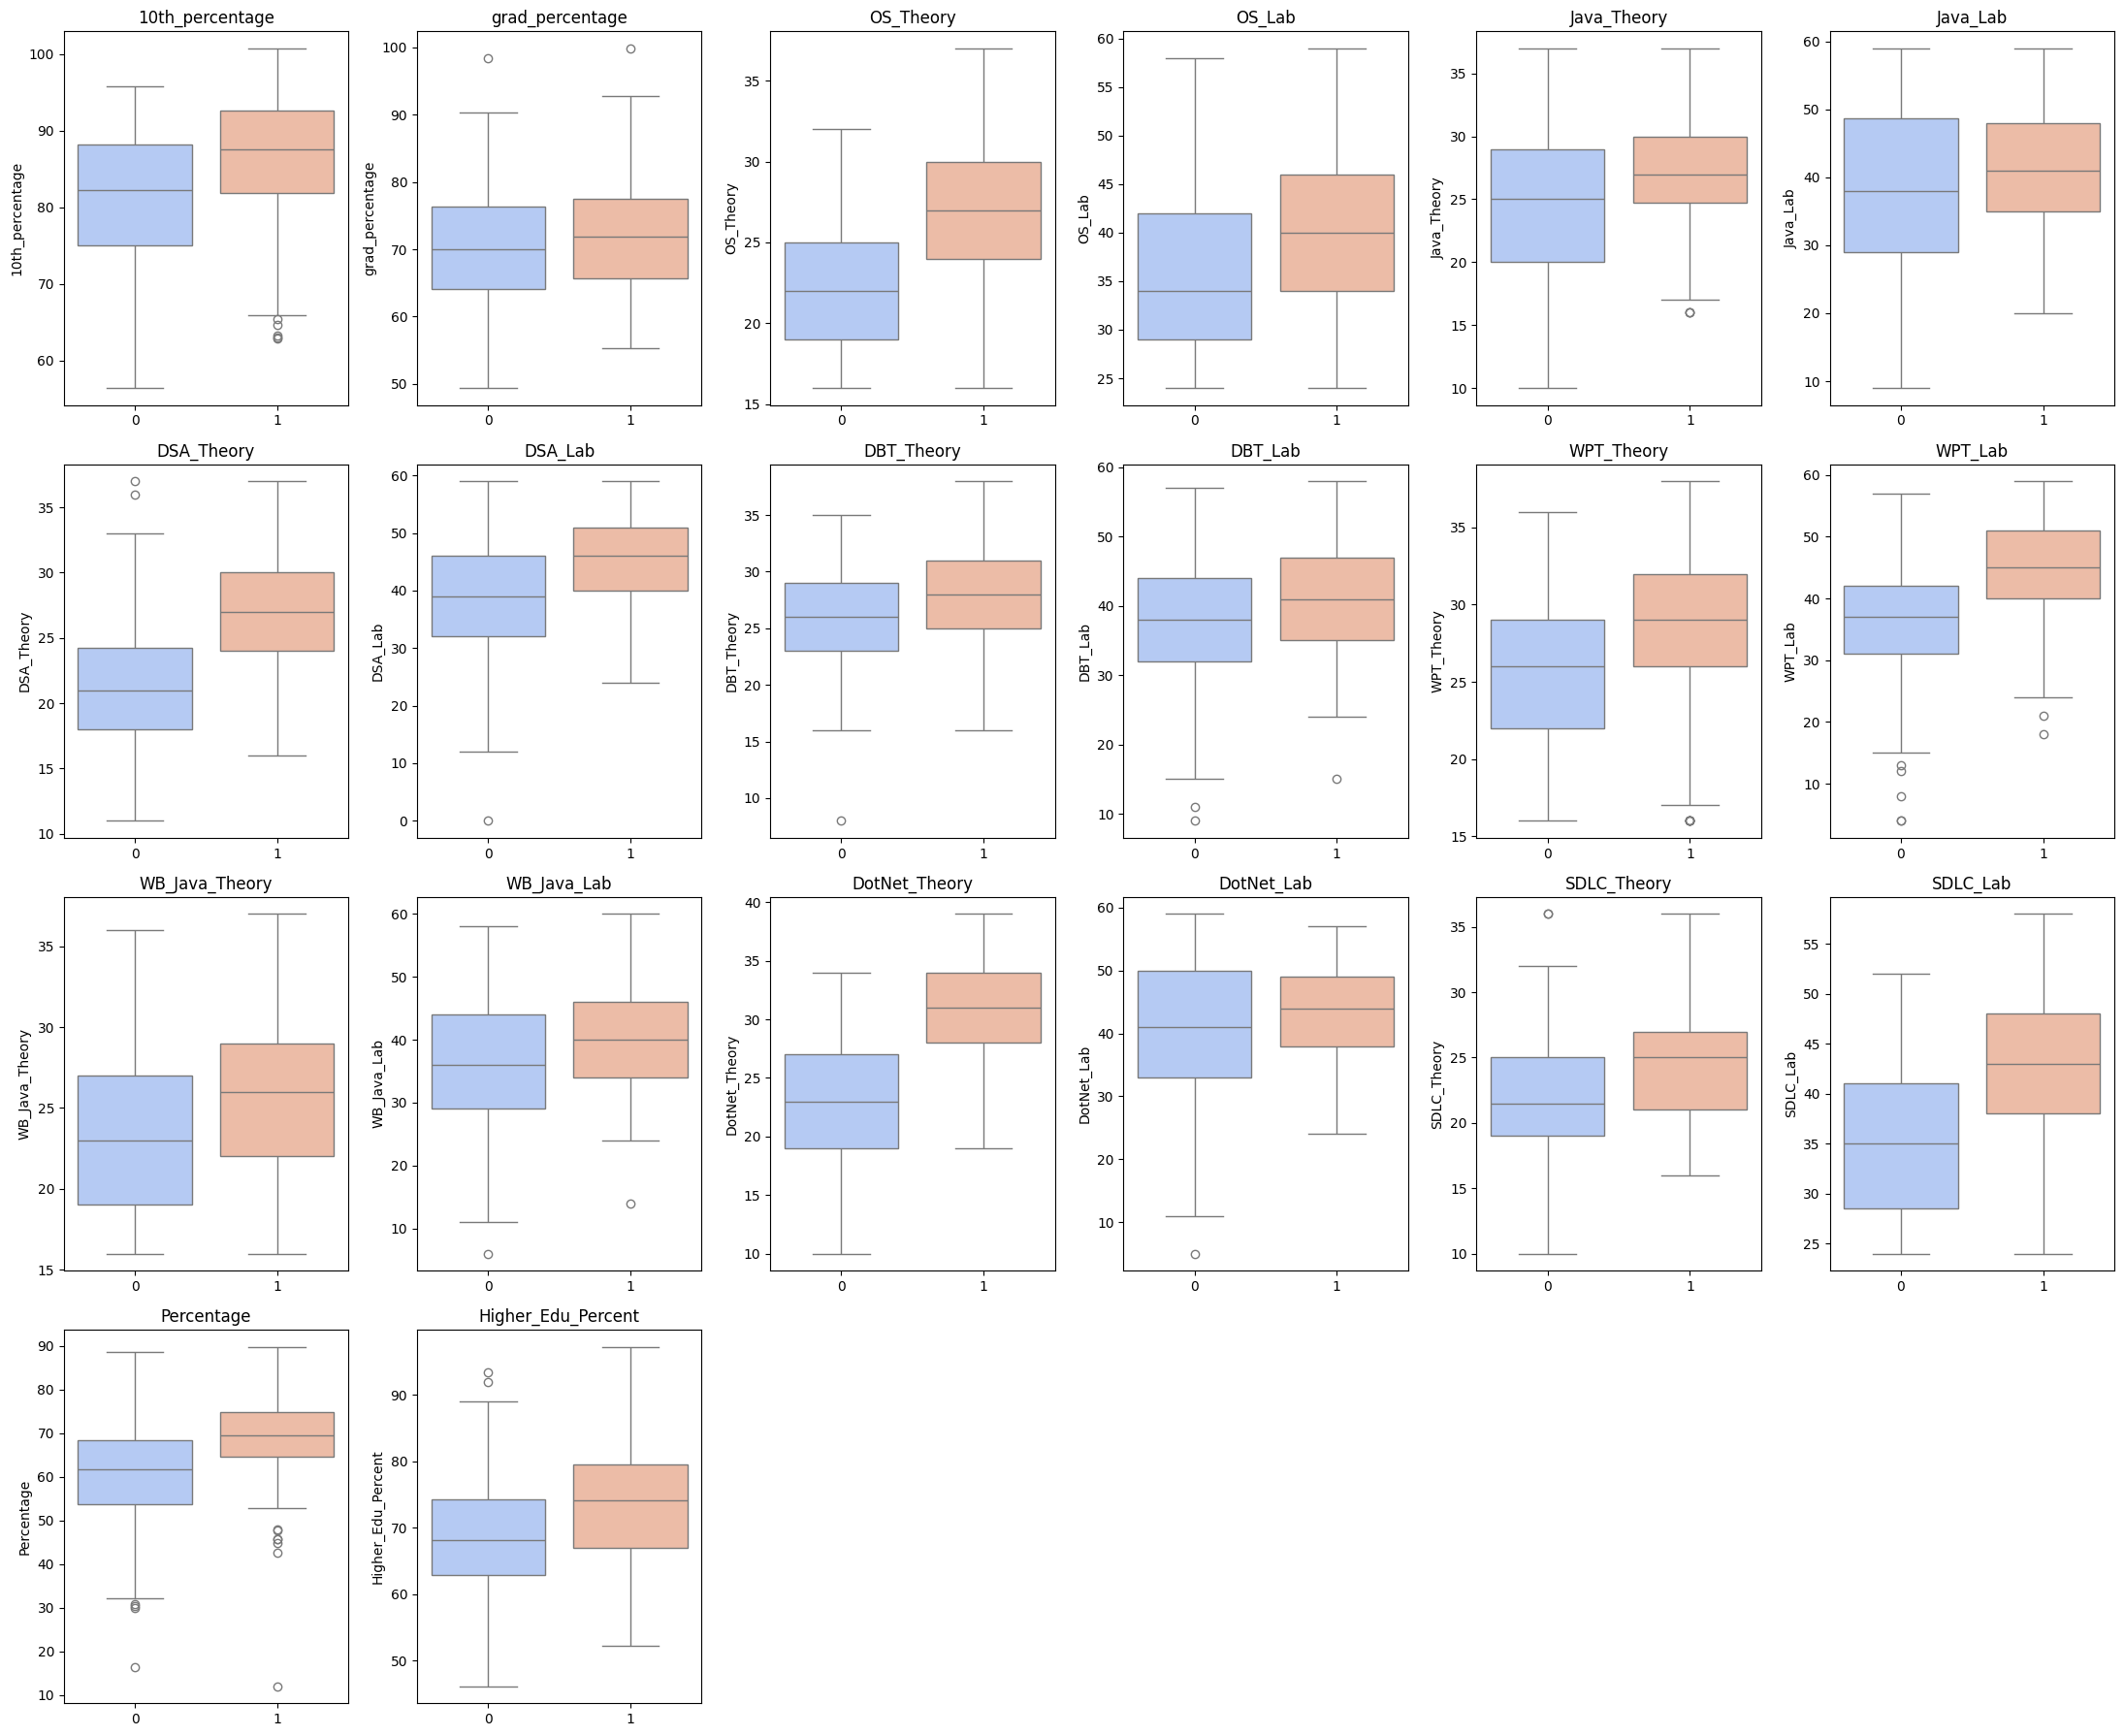

In [8]:
plt.figure(figsize=(22, 18))
for i, col in enumerate(numerical_cols[:-1], 1):  # Exclude "Is_Placed"
    plt.subplot(4, 6, i)
    sns.boxplot(x=df["Is_Placed"], y=df[col], palette="coolwarm")
    plt.title(col)
    plt.xlabel("")
plt.tight_layout()
plt.show()

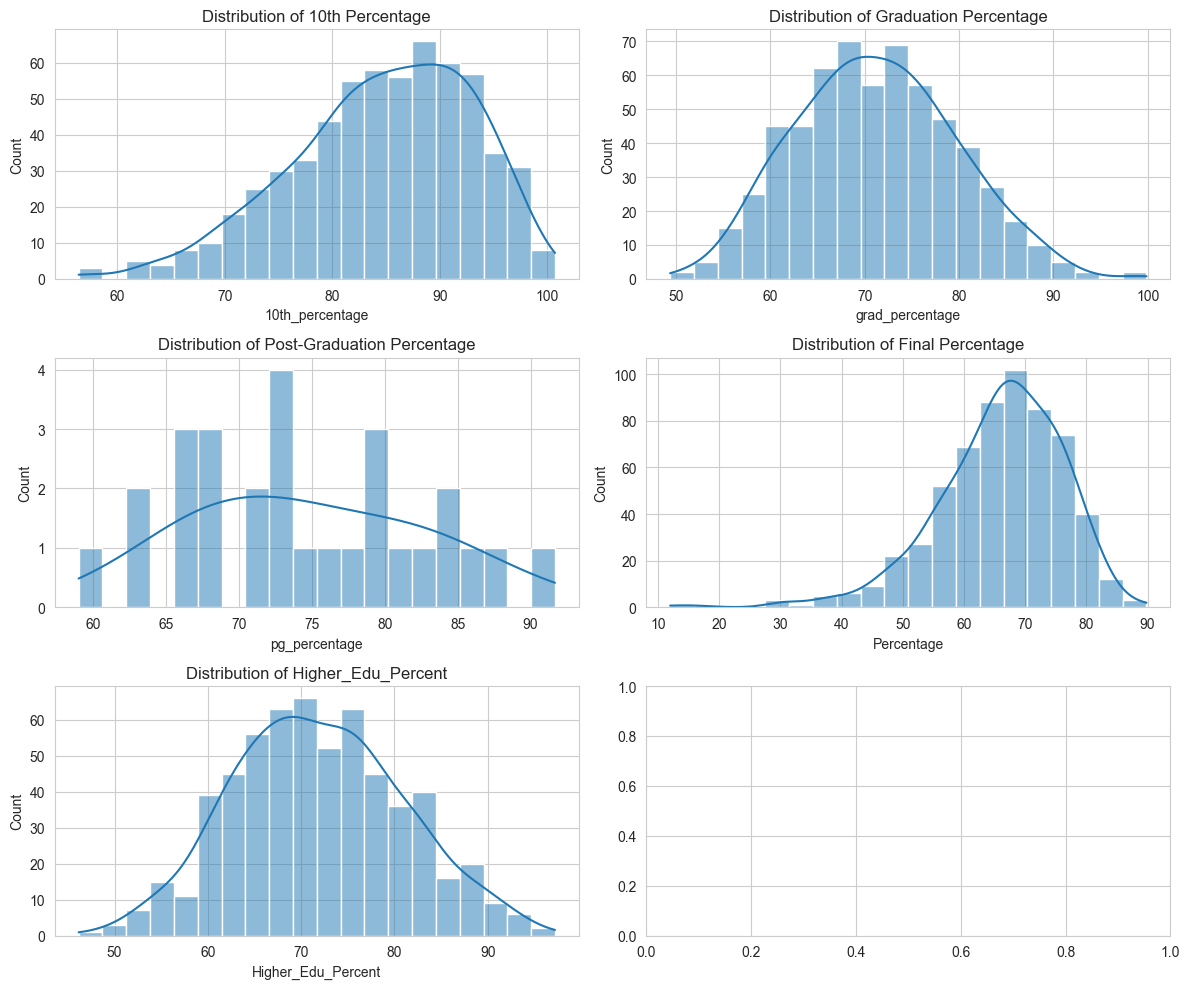

In [9]:
# Set plot style
sns.set_style("whitegrid")

# Create subplots for histograms of marks and percentages
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Histogram for 10th_percentage
sns.histplot(df['10th_percentage'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of 10th Percentage')

# Histogram for grad_percentage
sns.histplot(df['grad_percentage'].dropna(), bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Graduation Percentage')

# Histogram for pg_percentage
sns.histplot(df['pg_percentage'].dropna(), bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Post-Graduation Percentage')

# Histogram for overall Percentage
sns.histplot(df['Percentage'].dropna(), bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Final Percentage')

# Histogram for Higher Education Percentage
sns.histplot(df['Higher_Edu_Percent'].dropna(), bins=20, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Higher_Edu_Percent')

plt.tight_layout()
plt.show()


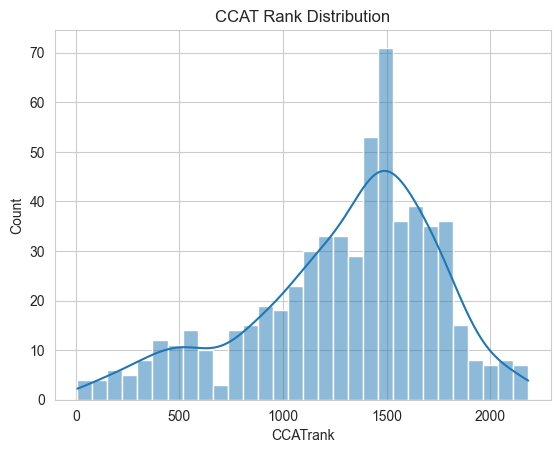

In [10]:
filtered_df = df[df['CCATrank'] != 'Other'].copy()

# Convert CCATrank to numeric
filtered_df['CCATrank'] = filtered_df['CCATrank'].astype(float)

# Plot CCAT Rank Distribution
sns.histplot(filtered_df['CCATrank'], bins=30, kde=True)
plt.title('CCAT Rank Distribution')
plt.show()

Subject Theory

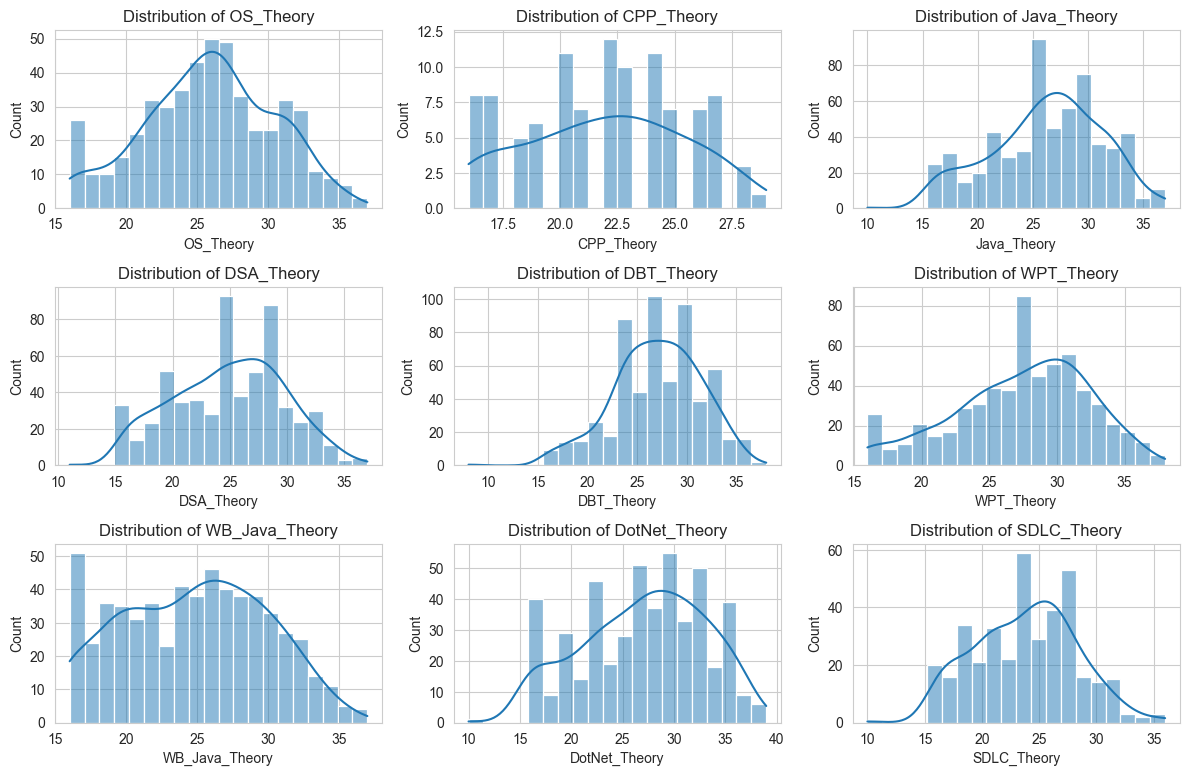

In [11]:
course_columns =['OS_Theory', 'CPP_Theory', 'Java_Theory', 'DSA_Theory', 'DBT_Theory',
 'WPT_Theory', 'WB_Java_Theory', 'DotNet_Theory', 'SDLC_Theory']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 10))  # Create a grid layout
axes = axes.flatten()  # Flatten to easily iterate over

for i, column in enumerate(course_columns):
    sns.histplot(df[column], kde=True, bins=20, ax=axes[i], alpha=0.5)
    axes[i].set_title(f"Distribution of {column}")

# Remove any empty subplot
if len(course_columns) < len(axes):
    for j in range(len(course_columns), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Subject Lab

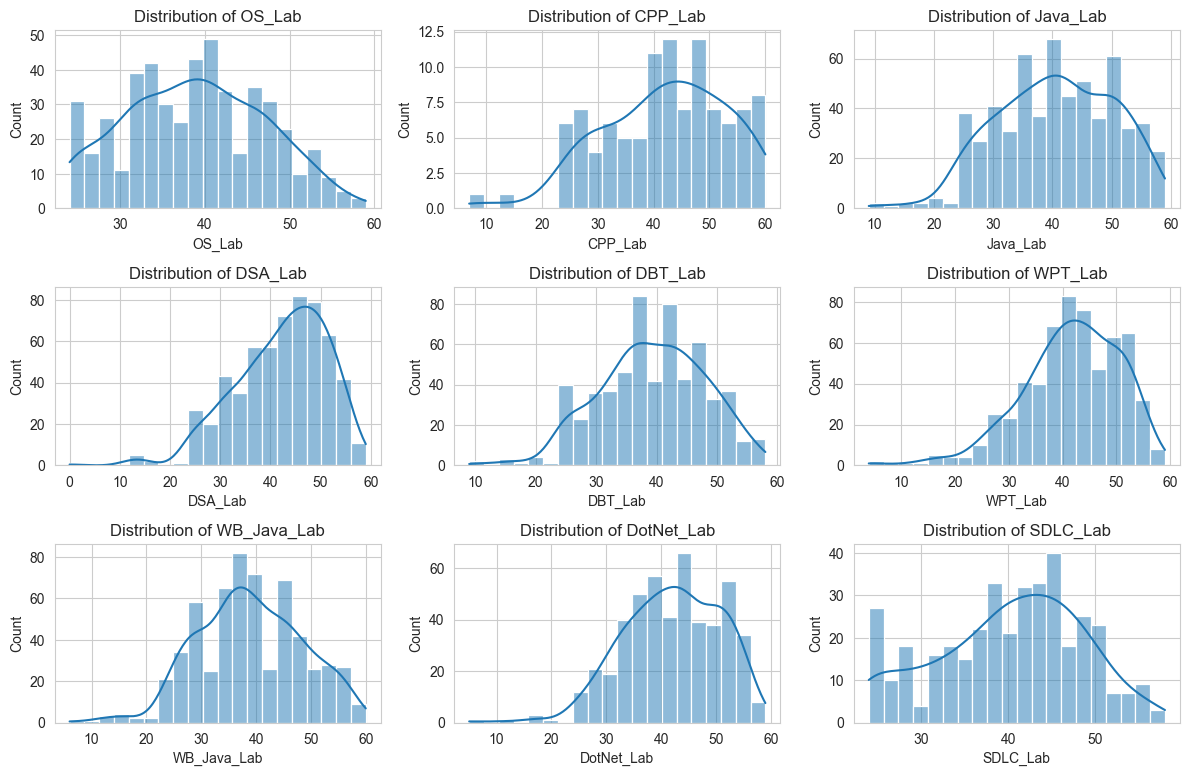

In [12]:
course_columns = ['OS_Lab', 'CPP_Lab', 'Java_Lab', 'DSA_Lab', 'DBT_Lab',
 'WPT_Lab', 'WB_Java_Lab', 'DotNet_Lab', 'SDLC_Lab']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 10))  # Create a grid layout
axes = axes.flatten()  # Flatten to easily iterate over

for i, column in enumerate(course_columns):
    sns.histplot(df[column], kde=True, bins=20, ax=axes[i], alpha=0.5)
    axes[i].set_title(f"Distribution of {column}")

# Remove any empty subplot
if len(course_columns) < len(axes):
    for j in range(len(course_columns), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Subject Total

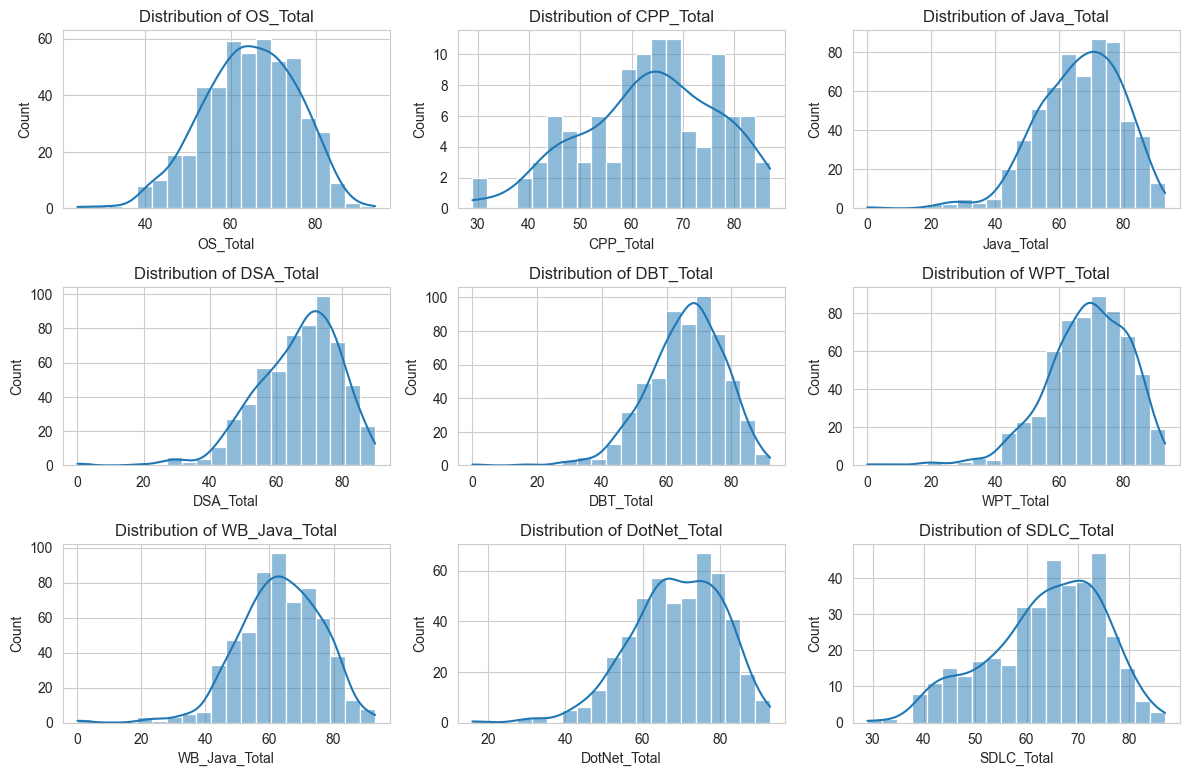

In [13]:
course_columns = ['OS_Total', 'CPP_Total', 'Java_Total', 'DSA_Total', 'DBT_Total', 'WPT_Total', 'WB_Java_Total', 'DotNet_Total', 'SDLC_Total']
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 10))  # Create a grid layout
axes = axes.flatten()  # Flatten to easily iterate over

for i, column in enumerate(course_columns):
    sns.histplot(df[column], kde=True, bins=20, ax=axes[i], alpha=0.5)
    axes[i].set_title(f"Distribution of {column}")

# Remove any empty subplot
if len(course_columns) < len(axes):
    for j in range(len(course_columns), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [14]:
# Define subjects
subjects = ['OS', 'CPP', 'Java', 'DSA', 'DBT', 'WPT', 'WB_Java', 'DotNet', 'SDLC']
theory_columns = [f"{sub}_Theory" for sub in subjects]
lab_columns = [f"{sub}_Lab" for sub in subjects]
total_columns = [f"{sub}_Total" for sub in subjects]

# Extract relevant columns
df_subset = df[theory_columns + lab_columns + total_columns]

# Compute average scores for each category
avg_theory = df_subset[theory_columns].mean()
avg_lab = df_subset[lab_columns].mean()
avg_total = df_subset[total_columns].mean()

# Create a grouped bar chart
fig = go.Figure()

fig.add_trace(go.Bar(x=subjects, y=avg_theory, name="Theory", marker_color="blue"))
fig.add_trace(go.Bar(x=subjects, y=avg_lab, name="Lab", marker_color="green"))
fig.add_trace(go.Bar(x=subjects, y=avg_total, name="Total", marker_color="red"))

# Update layout for better readability
fig.update_layout(
    title="Comparison of Theory, Lab, and Total Marks for Each Subject",
    xaxis_title="Subjects",
    yaxis_title="Average Marks",
    barmode="group",
    template="plotly_white"
)

# Show plot
fig.show()


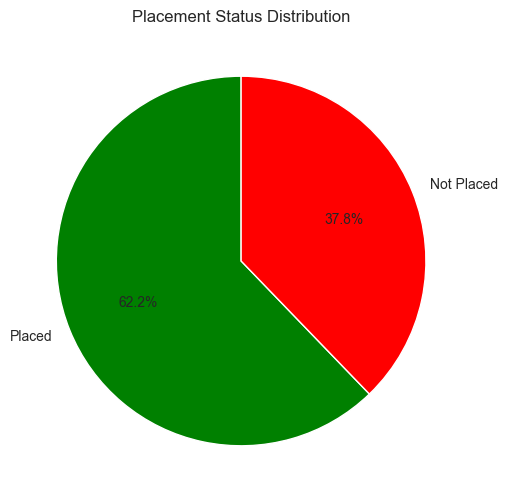

In [15]:
placement_counts = df['Is_Placed'].value_counts()

# Define new labels corresponding to Yes (Placed) and No (Not Placed)
labels = ['Placed', 'Not Placed']

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(placement_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title("Placement Status Distribution")
plt.show()


In [16]:
import plotly.express as px

# Count occurrences of each grade
grade_counts = df['Grade'].value_counts().reset_index()
grade_counts.columns = ['Grade', 'Count']

# Create a horizontal bar chart
fig = px.bar(
    grade_counts,
    x='Count',
    y='Grade',
    orientation='h',
    title="Grade Distribution",
    text='Count',  # Show count values on bars
    color='Grade',  # Different colors for each grade
    color_discrete_sequence=px.colors.qualitative.Set2  # Custom color palette
)

# Adjust layout
fig.update_layout(yaxis=dict(categoryorder="total ascending"))
fig.show()


In [17]:
grade_counts = df['Apti_EC_Grade'].value_counts().reset_index()
grade_counts.columns = ['Apti_EC_Grade', 'Count']

# Create a horizontal bar chart
fig = px.bar(
    grade_counts,
    x='Count',
    y='Apti_EC_Grade',
    orientation='h',
    title="Apti_EC_Grade Distribution",
    text='Count',  # Show count values on bars
    color='Apti_EC_Grade',  # Different colors for each grade
    color_discrete_sequence=px.colors.qualitative.Set2  # Custom color palette
)

# Adjust layout
fig.update_layout(yaxis=dict(categoryorder="total ascending"))
fig.show()

In [18]:
grade_counts = df['Project_Grade'].value_counts().reset_index()
grade_counts.columns = ['Project_Grade', 'Count']

# Create a horizontal bar chart
fig = px.bar(
    grade_counts,
    x='Count',
    y='Project_Grade',
    orientation='h',
    title="Project_Grade Distribution",
    text='Count',  # Show count values on bars
    color='Project_Grade',  # Different colors for each grade
    color_discrete_sequence=px.colors.qualitative.Set2  # Custom color palette
)

# Adjust layout
fig.update_layout(yaxis=dict(categoryorder="total ascending"))
fig.show()

Overall Grade vs Placed or Not

In [19]:

# Count occurrences of each Grade grouped by Placement Status
grade_placement_counts = df.groupby(['Grade', 'Is_Placed']).size().reset_index(name='Count')

# Create a stacked bar chart
fig = px.bar(
    grade_placement_counts,
    x='Grade',
    y='Count',
    color='Is_Placed',  # Different colors for Placed & Not Placed
    title="Stacked Bar Chart: Grade Distribution by Placement Status",
    labels={'Is_Placed': 'Placement Status', 'Count': 'Number of Students'},
    text='Count',  # Show count values on bars
    barmode='stack',  # Stack bars
    color_discrete_map={'Yes': 'green', 'No': 'red'}  # Custom colors for placement status
)

# Show plot
fig.show()


Project Grade vs Placement

In [20]:

grade_placement_counts = df.groupby(['Project_Grade', 'Is_Placed']).size().reset_index(name='Count')

# Create a stacked bar chart
fig = px.bar(
    grade_placement_counts,
    x='Project_Grade',
    y='Count',
    color='Is_Placed',  # Different colors for Placed & Not Placed
    title="Stacked Bar Chart: Project_Grade Distribution by Placement Status",
    labels={'Is_Placed': 'Placement Status', 'Count': 'Number of Students'},
    text='Count',  # Show count values on bars
    barmode='stack',  # Stack bars
    color_discrete_map={'Yes': 'green', 'No': 'red'}  # Custom colors for placement status
)

# Show plot
fig.show()

Apti Grade vs placement

In [21]:

grade_placement_counts = df.groupby(['Apti_EC_Grade', 'Is_Placed']).size().reset_index(name='Count')

# Create a stacked bar chart
fig = px.bar(
    grade_placement_counts,
    x='Apti_EC_Grade',
    y='Count',
    color='Is_Placed',  # Different colors for Placed & Not Placed
    title="Stacked Bar Chart: Apti_EC_Grade Distribution by Placement Status",
    labels={'Is_Placed': 'Placement Status', 'Count': 'Number of Students'},
    text='Count',  # Show count values on bars
    barmode='stack',  # Stack bars
    color_discrete_map={'Yes': 'green', 'No': 'red'}  # Custom colors for placement status
)

# Show plot
fig.show()

Grad Percentage vs Placed or not

In [22]:
import pandas as pd
import plotly.express as px

# Define bins for percentage ranges
bins = [0, 50, 60, 70, 80, 90, 100]
labels = ['0-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Create a new column for percentage ranges
df['grad_percentage_range'] = pd.cut(df['grad_percentage'], bins=bins, labels=labels, right=False)

# Count occurrences of each percentage range grouped by Placement Status
grade_placement_counts = df.groupby(['grad_percentage_range', 'Is_Placed']).size().reset_index(name='Count')

# Create a stacked bar chart
fig = px.bar(
    grade_placement_counts,
    x='grad_percentage_range',
    y='Count',
    color='Is_Placed',  # Different colors for Placed & Not Placed
    title="Stacked Bar Chart: Graduation Percentage vs Placement Status",
    labels={'Is_Placed': 'Placement Status', 'Count': 'Number of Students', 'grad_percentage_range': 'Graduation Percentage Range'},
    text='Count',  # Show count values on bars
    barmode='stack',  # Stack bars
    color_discrete_map={'Yes': 'green', 'No': 'red'}  # Custom colors for placement status
)

# Show plot
fig.show()

Age vs Placement

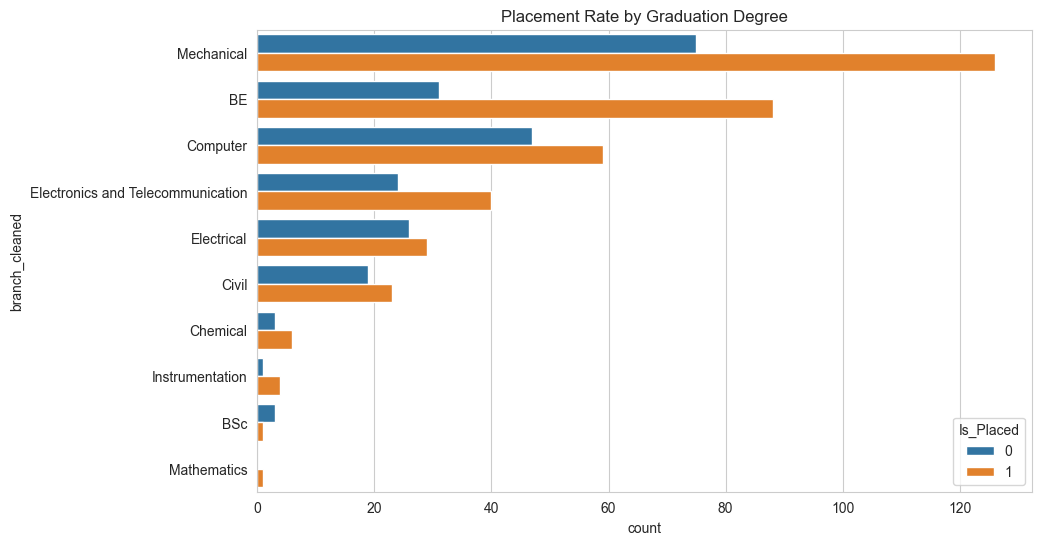

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['branch_cleaned'], hue=df['Is_Placed'], order=df['branch_cleaned'].value_counts().index[:10])
plt.title("Placement Rate by Graduation Degree")
plt.show()


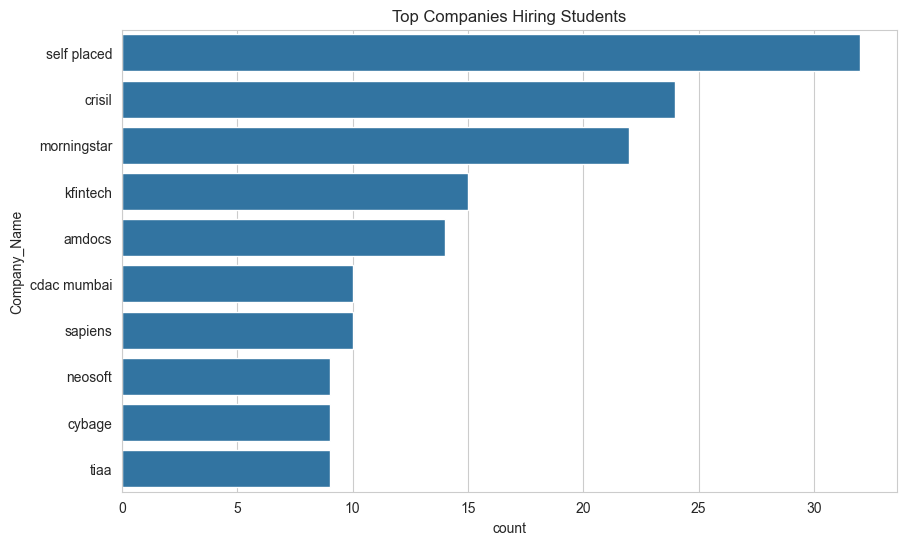

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Convert company names to lowercase and remove actual NaN values
df['Company_Name'] = df['Company_Name'].astype(str).str.lower().replace("nan", None)  # Replace string "nan" with None
df_filtered = df.dropna(subset=['Company_Name'])  # Drop rows with NaN

# Plot the count of top hiring companies
sns.countplot(y=df_filtered['Company_Name'], order=df_filtered['Company_Name'].value_counts().index[:10])
plt.title("Top Companies Hiring Students")
plt.show()



In [27]:
5/40

0.125